In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
from sklearn.cluster import KMeans

In [3]:
# load image
file_names = ['2cf92c40c3f3306321d789f7e9c12893.jpg', 'RobertMixed03.jpg', 'smallstrelitzia.jpg', 'smallsunset.jpg']
test_img_segs = [10, 20, 50]
test_img = ndimage.imread(fname=file_names[1])

Image segmentation using EM You can segment an image using a clustering method - each segment is the cluster center to which a pixel belongs. In this exercise, you will represent an image pixel by its r, g, and b values (so use color images!). Use the EM algorithm applied to the mixture of normal distribution model lectured in class to cluster image pixels, then segment the image by mapping each pixel to the cluster center with the highest value of the posterior probability for that pixel. You must implement the EM algorithm yourself (rather than using a package). Test images are here, and you should display results for all three of them. Till then, use any color image you care to.

Segment each of the test images to 10, 20, and 50 segments. You should display these segmented images as images, where each pixel's color is replaced with the mean color of the closest segment

We will identify one special test image. You should segment this to 20 segments using five different start points, and display the result for each case. Is there much variation in the result? The test image is the painting of trees

In [18]:
def e_step(pixel, mean):
    
    # initialization
    segment = mean.shape[0]
    result = np.zeros((segment))
    
    for i in range(segment):
        result[i] = np.dot((pixel - mean[i]), (pixel - mean[i]))
    
    return result

def plot_img(w, mean):
    rows, cols , _ = w.shape
    new_img = np.zeros((rows, cols, 3))
    
    for row in range(rows):
        for col in range(cols):
            # use pixel with highest probability among segments
            new_img[row][col] = mean[ np.argmax(w[row][col]) ]
    
    plt.imshow(Image.fromarray(new_img.astype(np.uint8), 'RGB'))
    plt.show()


# use KMeans for initialization
def EM(segments, img):
    # get number of rows and columns of the image
    rows, cols, _ = img.shape
    flatten_img = img.flatten().reshape((rows * cols, 3))
    
    # initialization
    mean = KMeans(n_clusters = segments).fit(flatten_img).cluster_centers_ # get starting point of each segment
    pi = np.full((segments, ), 1 / segments)
    w = np.zeros((rows, cols, segments))

    # start iteration
    iterations = 8
    threshold = 0.01
    print('Running iterations:')
    for iteration in range(iterations):
        print(iteration)
        
        # create deep copy of previous pi
        previous_pi = pi.copy()
        
        for segment in range(segments):
            
            # local variable
            sum_pixel = np.zeros((3))
            sum_data = 0
            
            # find all wij probabilities
            for row in range(rows):
                for col in range(cols):
                    
                    # loop throguh each segment
                    temp = e_step(img[row][col], mean)
                    
                    # rescale data to prevent overflow
                    temp = -0.5 * (temp - np.min(temp))
                    numerator = np.exp(temp[segment]) * pi[segment]
                    denomenator = np.dot(np.exp(temp), pi)
                    wij = numerator / denomenator
                    w[row][col][segment] = wij
                    
                    sum_pixel += img[row][col] * wij
                    sum_data += wij
            
            # update mean and pi
            mean[segment] = sum_pixel / sum_data
            pi[segment] = sum_data / (rows * cols)
        
        # break when the cluster converges
        if (np.mean(np.linalg.norm(pi - previous_pi)) < threshold):
            break
    print("ploting:")
    # plot image with current segments
    plot_img(w, mean)

Running iterations:
0
1
ploting:
[[[ 132.61110242  182.74076152  197.26574188]
  [ 132.61110242  182.74076152  197.26574188]
  [ 132.61110242  182.74076152  197.26574188]
  ..., 
  [ 132.61110242  182.74076152  197.26574188]
  [ 132.61110242  182.74076152  197.26574188]
  [ 132.61110242  182.74076152  197.26574188]]

 [[ 132.61110242  182.74076152  197.26574188]
  [ 132.61110242  182.74076152  197.26574188]
  [ 132.61110242  182.74076152  197.26574188]
  ..., 
  [ 132.61110242  182.74076152  197.26574188]
  [ 132.61110242  182.74076152  197.26574188]
  [ 132.61110242  182.74076152  197.26574188]]

 [[ 132.61110242  182.74076152  197.26574188]
  [ 132.61110242  182.74076152  197.26574188]
  [ 132.61110242  182.74076152  197.26574188]
  ..., 
  [ 132.61110242  182.74076152  197.26574188]
  [ 132.61110242  182.74076152  197.26574188]
  [ 132.61110242  182.74076152  197.26574188]]

 ..., 
 [[ 183.51433077  160.17592255  124.04247931]
  [ 185.2536709   179.57744179  158.59118168]
  [ 185.25

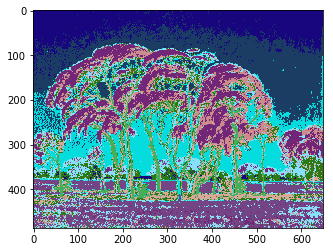

Done with iteration: 0
0.116301537144 [ 0.06739646  0.16902696  0.10499769  0.05526435  0.12335856  0.0751148
  0.13179458  0.12093796  0.04512054  0.10679236] [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
Done with iteration: 1
0.000174849994876 [ 0.06731621  0.16914111  0.10504693  0.05533208  0.12334846  0.07507665
  0.13180955  0.12098539  0.04512566  0.10678672] [ 0.06739646  0.16902696  0.10499769  0.05526435  0.12335856  0.0751148
  0.13179458  0.12093796  0.04512054  0.10679236]
<PIL.Image.Image image mode=RGB size=648x487 at 0x20FB58C8390>


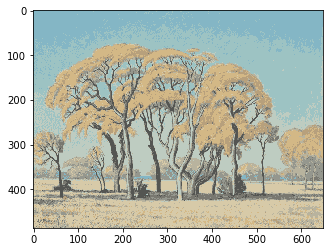

In [20]:
EM(10, ndimage.imread(fname=file_names[0]))